# Init

In [1]:
from time import time
import argparse


import numpy as np
from numba import jit

# Functions

## Numpy

In [2]:
def calc_numpy(x, y, n):
    res = np.zeros(len(x))
    for i in range(n):
        for j in range(n):
            res += np.add(i*x, j*y)
    return res

## Numba

In [3]:
@jit(nopython=True)
def calc_numba(x, y, n):
    res = np.zeros(len(x))
    for i in range(n):
        for j in range(n):
            res += np.add(i*x, j*y)
    return res

# Main

## Data

In [4]:
nobs = 1000
n = 100
x = np.random.randn(nobs)
y = np.random.randn(nobs)

## Numpy

### Run first time Numpy

In [5]:
res_numpy = calc_numpy(x, y, n)

### Run 2nd time Numpy

In [6]:
res_numpy = calc_numpy(x, y, n)

### Run 3rd time Numpy

In [7]:
res_numpy = calc_numpy(x, y, n)

## Numba

### Run 1rst time Numba

In [8]:
res_numba = calc_numba(x, y, n)

### Run 2nd time Numba

In [9]:
res_numba = calc_numba(x, y, n)

### Run 3rd time Numba

In [10]:
res_numba = calc_numba(x, y, n)

# Grid search

In [15]:
import pickle
import pandas as pd

In [40]:
def get_run_time(fpath: str = './run_time.pkl') -> pd.DataFrame:
    with open(fpath, 'rb') as pkf:
        run_times = pickle.load(pkf)
    df = pd.DataFrame.from_dict(run_times, orient='index')
    df.index.names=['n_loop', 'n_obs']
    return df.reset_index()

def get_subset(
    df,
    level=10,
    col='n_loop',
    id_col='n_obs'
    
) -> pd.DataFrame:
    cols = list(set(df.columns) - set([col]))
    return df.loc[df[col] == level][cols].set_index(id_col)


In [34]:
df = get_run_time('./run_time.pkl')
df

,n_loop,n_obs,time_numpy,time_numba
0,10,10,0.490189,498.106956
1,10,100,1.838923,0.120163
2,10,1000,4.585981,0.083923
3,10,10000,3.931999,0.911713
4,10,50000,17.482996,6.526947
5,10,100000,42.222738,14.043331
6,100,10,45.407057,1.242161
7,100,100,43.804884,2.356052
8,100,1000,71.232080,5.982161
9,100,10000,283.709049,91.379881


## Plot vs n_obs

In [47]:
df_sub = get_subset(
    df, level=100, col='n_loop', id_col='n_obs')

In [48]:
df_sub

,time_numba,time_numpy
n_obs,,
10,1.242161,45.407057
100,2.356052,43.804884
1000,5.982161,71.232080
10000,91.379881,283.709049
50000,655.061007,1322.622061
100000,1345.312834,3412.963152


Text(0.5, 0, 'Data size')

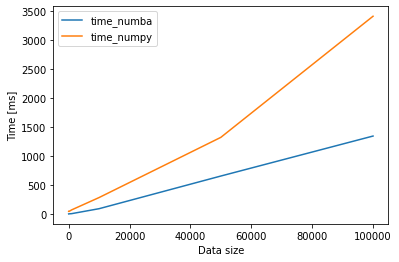

In [49]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df_sub.plot(ax=ax)
ax.set_ylabel('Time [ms]')
ax.set_xlabel('Data size')


## Plot vs n_loops

Text(0.5, 0, 'Number of loops')

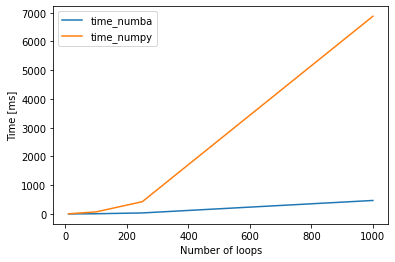

In [46]:
df_sub = get_subset(
    df, level=1000, col='n_obs', id_col='n_loop')

fig, ax = plt.subplots()
df_sub.plot(ax=ax)
ax.set_ylabel('Time [ms]')
ax.set_xlabel('Number of loops')

## Performance heat-map

In [51]:
df['numpy/numba'] = df['time_numpy']/df['time_numba']
df

,n_loop,n_obs,time_numpy,time_numba,numpy/numba
0,10,10,0.490189,498.106956,0.000984
1,10,100,1.838923,0.120163,15.303571
2,10,1000,4.585981,0.083923,54.644886
3,10,10000,3.931999,0.911713,4.312762
4,10,50000,17.482996,6.526947,2.678587
5,10,100000,42.222738,14.043331,3.006604
6,100,10,45.407057,1.242161,36.554894
7,100,100,43.804884,2.356052,18.592491
8,100,1000,71.232080,5.982161,11.907417
9,100,10000,283.709049,91.379881,3.104721


In [57]:
numpy_vs_numba_df = pd.pivot_table(df, values='numpy/numba', columns='n_obs', index='n_loop')

In [58]:
import seaborn as sns

In [56]:
#!pip install seaborn

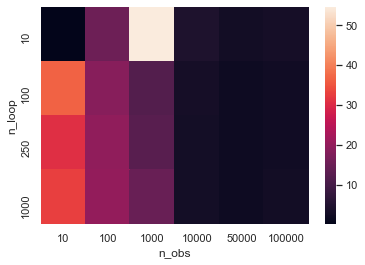

In [60]:
sns.set_theme()
ax = sns.heatmap(numpy_vs_numba_df)

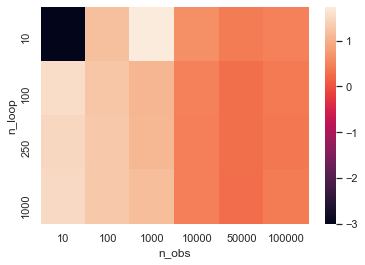

In [65]:
import numpy as np

sns.set_theme()
ax = sns.heatmap(np.log10(numpy_vs_numba_df))